In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import neurokit2 as nk
import pickle
from concurrent.futures import ThreadPoolExecutor
from scipy.signal import butter, lfilter
from tqdm import tqdm

In [3]:
with open ('saved_reshaped_data.pkl','rb') as f:
    processed_data = pickle.load(f)

In [5]:
def bandpass_filter(signal, lowcut, highcut, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

In [ ]:
# Progress bar setup:

total_files = len(processed_data)
progress_bar = tqdm(total = total_files, desc = 'Filtering is in process...')


# Bandpass filter parameters:

lowcut = 0.5
highcut = 24.0
sampling_rate = 500

filtered_data_1 = {}

# Applying Bandpass filter:

for filepath, data in processed_data.items():
    if filepath.endswith('.mat'):
        ecg_signal = data['val'].flatten()
        filtered_signal = bandpass_filter(ecg_signal,lowcut,highcut,sampling_rate)
        filtered_data_1[filepath] = filtered_signal
    progress_bar.update(1)
progress_bar.close()

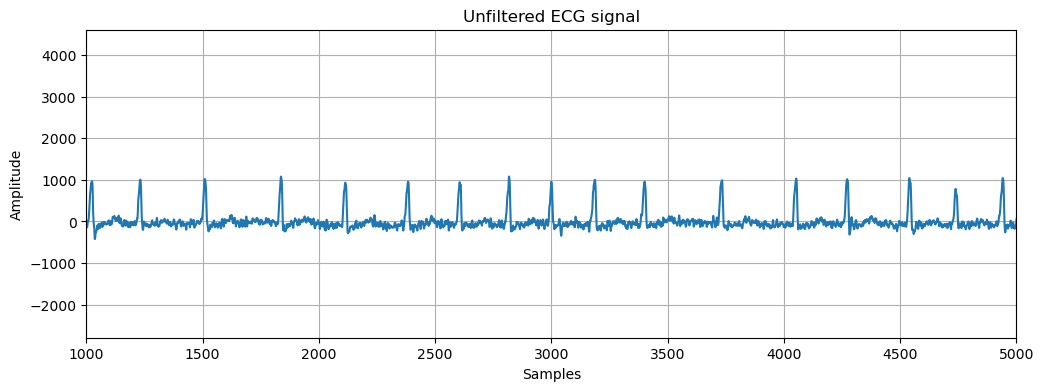

In [12]:
# Unfiltered signal: 

mat_data = processed_data['C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0004.mat']
ecg_signal = mat_data['val'].flatten()
ecg_signal_processed = ecg_signal[~np.isnan(ecg_signal)]
ecg_processed = nk.ecg_process(ecg_signal_processed)
lead_name = "ECG_Raw" 

plt.figure(figsize=(12, 4))
plt.plot(ecg_processed[0][lead_name])  
plt.title("Unfiltered ECG signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(1000,5000)
plt.show()

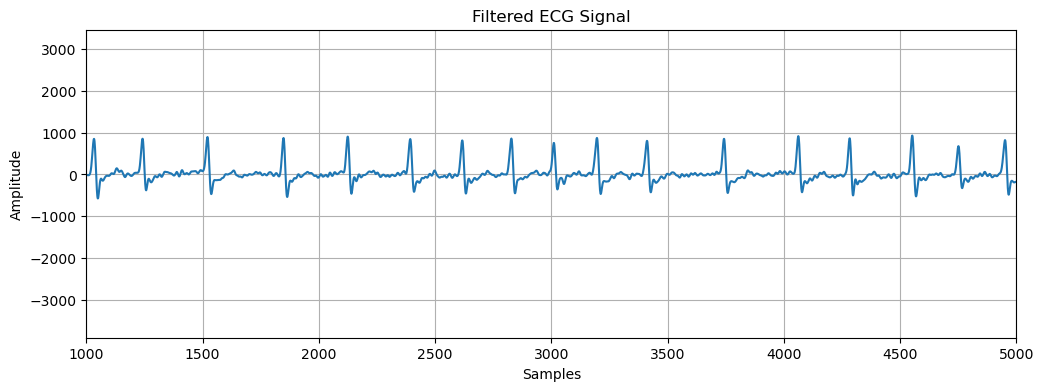

In [13]:
# Filtered Signal:

filtered_ecg_signal = filtered_data_1['C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0004.mat']

plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg_signal)  
plt.title("Filtered ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(1000, 5000)
plt.show()

In [14]:
with open ('saved_filtered_data_1.pkl', 'wb')as f:
    pickle.dump(filtered_data_1,f)